In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#leitura dos dados
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S


In [ ]:
# Análise Exploratória de dados (EDA)
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


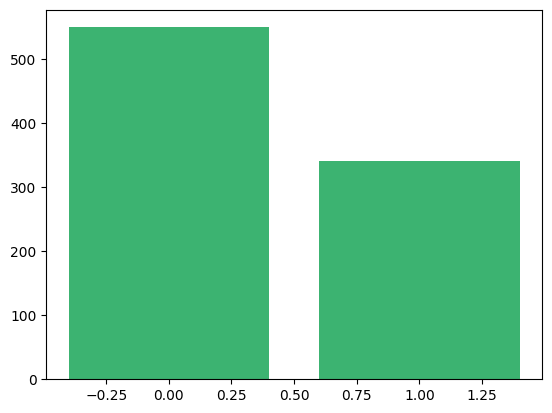

In [ ]:
# Análise Univariada
counts = df_train["Survived"].value_counts()
plt.bar(counts.index, counts.values, color='mediumseagreen');

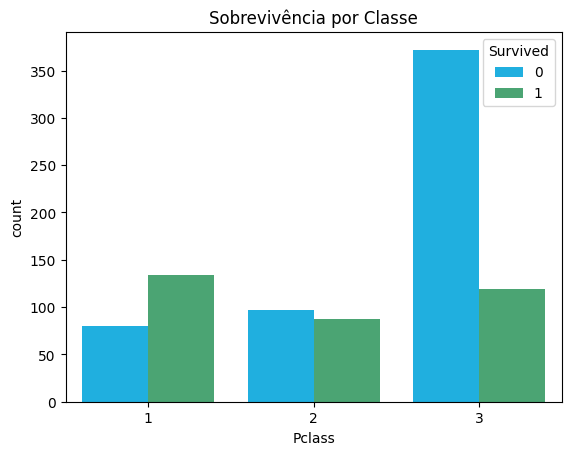

In [ ]:
# Análise Bivariada
# sobreviventes por classe do navio
sns.countplot(data=df_train, x="Pclass", hue="Survived",
              palette={0: "deepskyblue", 1: "mediumseagreen"})
plt.title('Sobrevivência por Classe')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

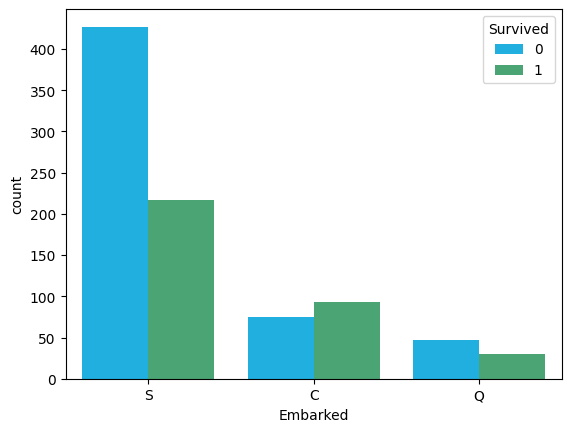

In [ ]:
# sobreviventes por porto de embarque
sns.countplot(data=df_train, x="Embarked", hue="Survived",
              palette={0: "deepskyblue", 1: "mediumseagreen"})

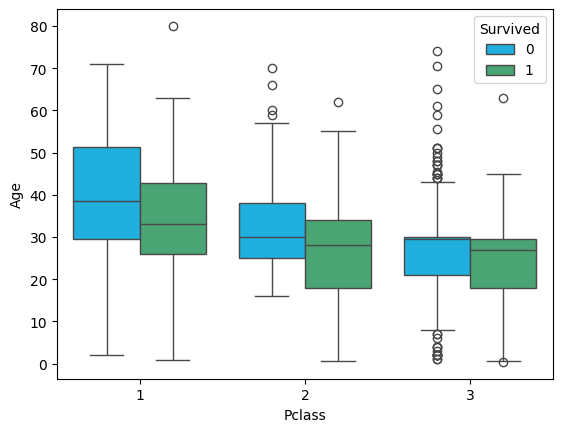

In [ ]:
# Análise Multivariada

sns.boxplot(data=df_train, x="Pclass", y="Age", hue="Survived",
            palette={0: "deepskyblue", 1: "mediumseagreen"});

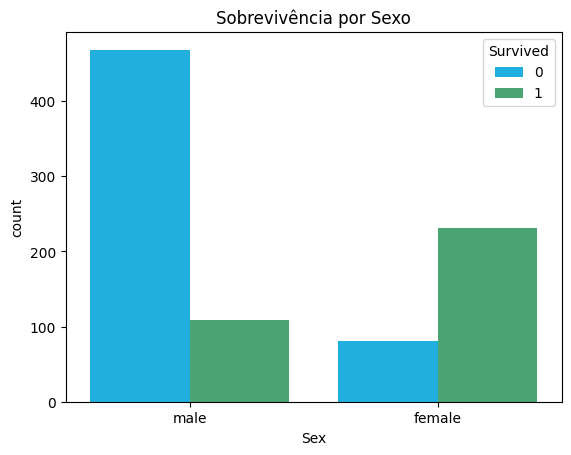

In [ ]:
# Sobrevivência por sexo
sns.countplot(x='Sex', hue='Survived', data=df_train,
              palette={0: "deepskyblue", 1: "mediumseagreen"})
plt.title('Sobrevivência por Sexo')
plt.show()

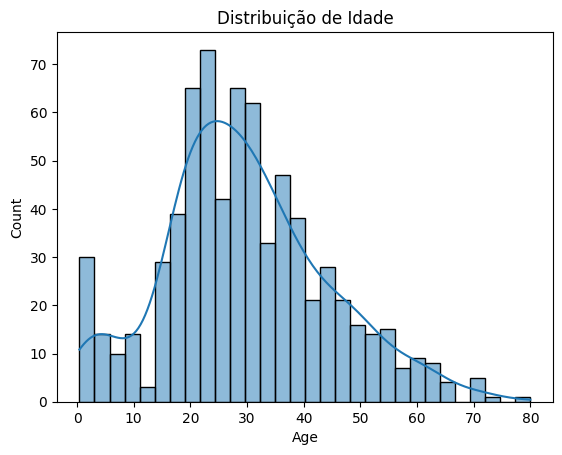

In [ ]:
# Distribuição da idade
sns.histplot(df_train['Age'].dropna(), kde=True, bins=30)
plt.title('Distribuição de Idade')
plt.show()

In [ ]:
# tratamento dos dados
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_train.shape

(891, 8)

In [ ]:
#Removendo Nulos restantes

df_train = df_train.dropna(subset=["Embarked"])
df_train.shape

(889, 8)

In [ ]:
train_mean_age = df_train["Age"].mean()
df_train.loc[:, "Age"] = df_train["Age"].fillna(train_mean_age)

In [ ]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Normalização dos Dados

features = df_train.columns.tolist()
target = "Survived"
features.remove(target)

print('Features', features)
print('Target', target)


Features ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Target Survived


In [ ]:
X = df_train[features]
y = df_train[target]

print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (889, 7)
y.shape (889,)


In [ ]:
X.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
# normalizando as colunas numéricas e transformando as colunas categoricas em representações numéricas

In [ ]:
# One-Hot Encoding
categorical_features = []
numerical_features = []

for feat in features:
    if X[feat].dtype == object:
        categorical_features.append(feat)
    else:
        numerical_features.append(feat)

print('Features categóricas', categorical_features)
print('Features numéricas', numerical_features)


Features categóricas ['Sex', 'Embarked']
Features numéricas ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(sparse_output=False), categorical_features),
    ("scale", StandardScaler(), numerical_features)
])

In [ ]:
X_norm_data = preprocessor.fit_transform(X)
X_norm =  pd.DataFrame(X_norm_data, columns=preprocessor.get_feature_names_out())

X_norm.head()

,onehot__Sex_female,onehot__Sex_male,onehot__Embarked_C,onehot__Embarked_Q,onehot__Embarked_S,scale__Pclass,scale__Age,scale__SibSp,scale__Parch,scale__Fare
0,0.0,1.0,0.0,0.0,1.0,0.825209,-0.589620,0.431350,-0.474326,-0.500240
1,1.0,0.0,1.0,0.0,0.0,-1.572211,0.644848,0.431350,-0.474326,0.788947
2,1.0,0.0,0.0,0.0,1.0,0.825209,-0.281003,-0.475199,-0.474326,-0.486650
3,1.0,0.0,0.0,0.0,1.0,-1.572211,0.413385,0.431350,-0.474326,0.422861
4,0.0,1.0,0.0,0.0,1.0,0.825209,0.413385,-0.475199,-0.474326,-0.484133


In [ ]:
# Modelagem

In [ ]:
# K-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [ ]:
# Treinando o modelo
knn.fit(X_norm, y);

In [ ]:
# Validação

In [ ]:
# definindo os parâmetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13], # 6 valores
    'weights': ['uniform', 'distance'], # 2 valores
    'metric': ['euclidean', 'manhattan', 'minkowski'] # 3 valores
} # total de 6 * 2 * 3 = 36 conjuntos de parametros

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_norm, y)

best_knn = grid_search.best_estimator_
print("Best model", best_knn)
print("Best score", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best model KNeighborsClassifier(metric='manhattan', n_neighbors=9)
Best score 0.8166761886624769


In [ ]:
# Predição no Teste

df_test = pd.read_csv("test.csv")

passenger_ids = df_test["PassengerId"].values
df_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [ ]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
train_mean_age = df_train["Age"].mean()
train_mean_fare = df_train["Fare"].mean()

df_test.loc[:, "Age"] = df_test["Age"].fillna(train_mean_age)
df_test.loc[:, "Fare"] = df_test["Fare"].fillna(train_mean_fare)

In [ ]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
X_test_norm_data = preprocessor.transform(df_test) # não usamos fit aqui
X_test_norm =  pd.DataFrame(X_test_norm_data, columns=preprocessor.get_feature_names_out())

In [ ]:
test_preds = best_knn.predict(X_test_norm)

In [ ]:
submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": test_preds})
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df.to_csv("my_submission.csv", index=False)